# Описание проекта:

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Этапы выполнения:

1. Загрузите и подготовьте данные. Поясните порядок действий


2. Обучите и проверьте модель для каждого региона:
- 2.1 Разбейте данные на обучающую и валидационную выборки в соотношении 75:25
- 2.2 Обучите модель и сделайте предсказания на валидационной выборке
- 2.3 Сохраните предсказания и правильные ответы на валидационной выборке
- 2.4 Напечатайте на экране средний запас предсказанного сырья и RMSE модели
- 2.5 Проанализируйте результаты

3. Подготовьтесь к расчёту прибыли:
- 3.1 Все ключевые значения для расчётов сохраните в отдельных переменных
- 3.2 Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе
- 3.3 Напишите выводы по этапу подготовки расчёта прибыли

4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- 4.1 Выберите скважины с максимальными значениями предсказаний
- 4.2 Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям
- 4.3 Рассчитайте прибыль для полученного объёма сырья

5. Посчитайте риски и прибыль для каждого региона:
- 5.1 Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- 5.2 Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- 5.3 Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

# Описание данных
Данные геологоразведки трёх регионов находятся в файлах: 
- /datasets/geo_data_0.csv
- /datasets/geo_data_1.csv
- /datasets/geo_data_2.csv
- id — уникальный идентификатор скважины
-  f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы)
- product — объём запасов в скважине (тыс. баррелей)

## Загрузка и подготовка данных

### Импорты:

In [1]:
!pip install phik -q
import phik

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

### Загрузка данных:

In [3]:
data1 = pd.read_csv('/datasets/geo_data_0.csv')
data2 = pd.read_csv('/datasets/geo_data_1.csv')
data3 = pd.read_csv('/datasets/geo_data_2.csv')

### Анализ данных:

#### Просмотрим общую информацию:

In [4]:
display(data1.info())
display(data2.info())
display(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Все данные - подходящих типов

Пропусков нет, можно не беспокоиться о них

In [5]:
display(data1.describe())
display(data2.describe())
display(data3.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [6]:
display(data1.nunique())
display(data2.nunique())
display(data3.nunique())

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

#### Проверим дубликаты:

In [7]:
print('Дубликаты в data1:',data1.duplicated().sum())
print('Дубликаты в data2:',data2.duplicated().sum())
print('Дубликаты в data3:',data3.duplicated().sum())

Дубликаты в data1: 0
Дубликаты в data2: 0
Дубликаты в data3: 0


#### Удалим столбцы id:

In [8]:
data1 = data1.drop(['id'], axis=1)
data2 = data2.drop(['id'], axis=1)
data3 = data3.drop(['id'], axis=1)

#### Напишем функцию для выведения матриц корреляции:

In [9]:
# Вычисление матриц корреляции с использованием phik
def corr_matrix(data):
    corr_matrix = data.phik_matrix()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Матрица корреляции PhiK')
    plt.show()

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


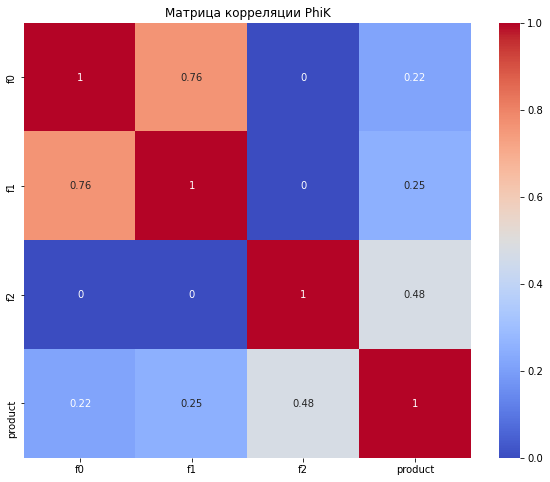

In [10]:
corr_matrix(data1)

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


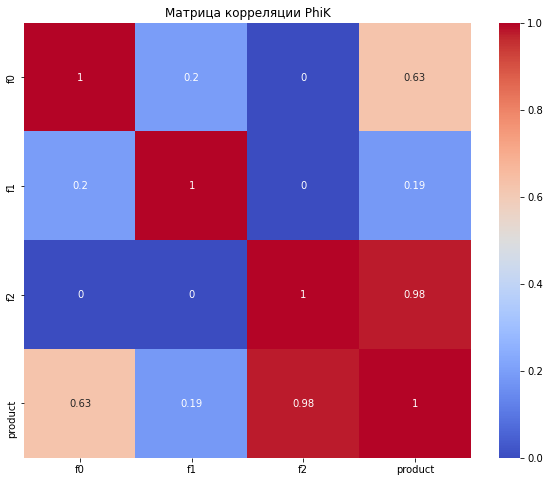

In [11]:
corr_matrix(data2)

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


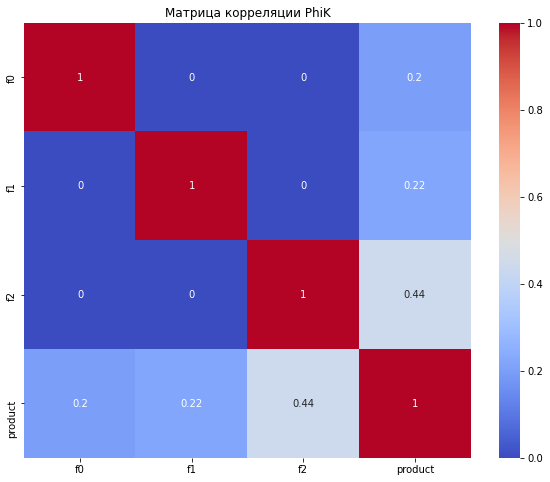

In [12]:
corr_matrix(data3)

1. Видим аномально высокий уровень корреляции f2 и product, равный 0.98 в датасете data2
2. В data1 и data3 корреляция между этими признаками тоже относительно высокая и равна 0.48 и 0.44 соответственно

Данные особенности, скорее всего, могут мешать обучению

#### Стоит посмотреть на распределение залежей по регионам:

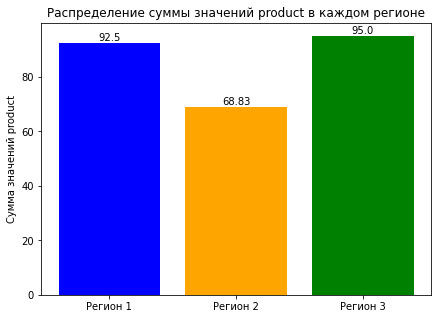

In [13]:
# Данные
regions = ['Регион 1', 'Регион 2', 'Регион 3']
sum_product = [92.500000, 68.825000, 95.000000]

# Создание столбчатой диаграммы
plt.figure(figsize=(7, 5))
plt.bar(regions, sum_product, color=['blue', 'orange', 'green'])

# Настройка осей и заголовка
plt.ylabel('Сумма значений product')
plt.title('Распределение суммы значений product в каждом регионе')

# Отображение значений над столбцами
for i, value in enumerate(sum_product):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Отображение графика
plt.show()

Регион 2(data2) показывает сильно отличающийся от других двух регионов объём залежей

# Выводы:
1. Данные подготовлены, пропусков и дублей нет, формат данных нормальный
2. Категориальных данных никаких нет
3. 1 и 3 регионы располагают большими залежами, чем 2
4. Интересный момент по региону #1 - данные по всей видимости как-то разбиты на категории - там всего всего 12 значений в колонке product и всвязи с этим могут возникнуть трудности

## Обучение и проверка модели

Обучите и проверьте модель для каждого региона:
- 2.1 Разбейте данные на обучающую и валидационную выборки в соотношении 75:25
- 2.2 Обучите модель и сделайте предсказания на валидационной выборке
- 2.3 Сохраните предсказания и правильные ответы на валидационной выборке
- 2.4 Напечатайте на экране средний запас предсказанного сырья и RMSE модели
- 2.5 Проанализируйте результаты

### Обучим модели:

In [14]:
RANDOM_STATE = 42

In [15]:
def linear_predict(data):
    features = data.drop(['product'], axis=1)
    target = data['product']
    
    features_train, features_valid, target_train, t_valid = train_test_split(features,
                                                                             target,
                                                                             test_size=0.25,
                                                                             random_state=RANDOM_STATE)
    
    model = LinearRegression(n_jobs=-1).fit(features_train, target_train)
    predictions = model.predict(features_valid)
    mse = mean_squared_error(t_valid, predictions)
    rmse = mse ** 0.5
    stock_mean = data['product'].mean()
    stock_mean_pred = predictions.mean()
    t_valid = t_valid.reset_index(drop=True)
    
    return predictions, rmse, stock_mean_pred, t_valid

In [16]:
# Словарь для хранения данных по каждому региону
regions_data = {}

# Обучаем и получаем предсказания для каждого региона
for region, data in zip(range(3), [data1, data2, data3]):
    predictions, rmse, stock_mean_pred, t_valid = linear_predict(data)
    regions_data[f'Регион {region + 1}:'] = {'predictions': predictions,
                                                 'rmse': rmse,
                                                 'stock_mean_pred': stock_mean_pred,
                                                 't_valid': t_valid}

In [17]:
# Выводим результаты
for region, data in regions_data.items():
    print(region)
    print('RMSE модели = {:.1f}'.format(data['rmse']))
    print('Средний запас предсказанного сырья = {:.1f} тыс. баррелей'.format(data['stock_mean_pred'])) 
    print()

Регион 1:
RMSE модели = 37.8
Средний запас предсказанного сырья = 92.4 тыс. баррелей

Регион 2:
RMSE модели = 0.9
Средний запас предсказанного сырья = 68.7 тыс. баррелей

Регион 3:
RMSE модели = 40.1
Средний запас предсказанного сырья = 94.8 тыс. баррелей



# Выводы(промежуточные):

- data1 и data3 - высокие значения RMSE в сравнении со средним предсказанным значением залежей - скорее всего из-за разброса данных в выборках данных
- data2 - очень низкое значение RMSE(0.89) - скорее всего всвязи с переобучением модели из-за корреляции f2 и product близкой к 1

## Подготовка к расчёту прибыли

- 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных
- 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе
- 3.3. Напишите выводы по этапу подготовки расчёта прибыли

### Обозначим переменные:

- PTS = points => точки добычи
- BEST_PTS => лучшие точки добычи
- BUDGET => общий бюджет
- PPP = profit per product => доход с единицы продукта

In [18]:
PTS = 500
BEST_PTS = 200
BUDGET = 10000000000
PPP = 450000

In [19]:
req_mean = BUDGET / BEST_PTS / PPP
print('Необходимый объем для безубыточной разработки: {:.1f} тыс. баррелей'.format(req_mean))

Необходимый объем для безубыточной разработки: 111.1 тыс. баррелей


# Выводы(промежуточные):

Средний объем сырья в каждом из регионов ниже точки безубыточности (111.1 тыс. баррелей)

Это значит, что разработку всех скважин стоит считать нецелесообразной и стоит потратить средства лишь на разработку лучших 200 скважин в каждом регионе

## Расчёт прибыли и рисков 

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- 4.1. Выберите скважины с максимальными значениями предсказаний
- 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям

In [20]:
# Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели
def calculate_profit(target, probabilities, count):
    prob_s = probabilities.sort_values(ascending=False)
    selected = target[prob_s.index][:count]
    return (PPP * selected.sum() - BUDGET)

In [21]:
# Выводим прибыль для каждого региона
for region, data in regions_data.items():
    profit_value = calculate_profit(data['t_valid'], pd.Series(data['predictions']), 200)
    print(f'{region} {profit_value / 10**6:.1f} млн. р')

Регион 1: 3359.1 млн. р
Регион 2: 2415.1 млн. р
Регион 3: 2598.6 млн. р


- 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [22]:
RANDOM_STATE = np.random.RandomState(12345)

In [23]:
def calc_bootstrap(target, probabilities, region):
    values = []
    for i in range(1000):
        target_subsample = target.sample(500, replace=True, random_state=RANDOM_STATE)
        probs_subsample = probabilities[target_subsample.index] 
        values.append(calculate_profit(target_subsample, probs_subsample, 200))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    minus = (values < 0).mean()
    suc_int = (values.quantile(0.025) / 10**6, values.quantile(0.975) / 10**6)
    mean = values.mean() / 10**6
    print(f'{region}')
    print('Средняя прибыль: {:.1f} млн. р'.format(mean))
    print('Доверительный интервал: {:.1f} - {:.1f} млн. р'.format(*suc_int))
    print('Риск убытков: {:.1%}'.format(minus))

In [24]:
# Вызываем функции для каждого региона
for region, data in regions_data.items():
    calc_bootstrap(data['t_valid'], pd.Series(data['predictions']), region)

Регион 1:
Средняя прибыль: 435.9 млн. р
Доверительный интервал: -116.2 - 966.5 млн. р
Риск убытков: 6.1%
Регион 2:
Средняя прибыль: 498.6 млн. р
Доверительный интервал: 75.3 - 911.5 млн. р
Риск убытков: 1.0%
Регион 3:
Средняя прибыль: 412.7 млн. р
Доверительный интервал: -158.9 - 978.2 млн. р
Риск убытков: 7.0%


# Выводы:

Результаты проведенного исследования показывают, что стоит остановить свой выбор на регионе 2, так как у него нет отрицательных значений в рамках его доверительного интервала, а так же риск убытков составляет всего лишь около 1%

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован